# Various simulations related to the signature with the signatory library

### Mechanism for Brownian Motion

In [1]:
pip install torch==1.7.1 --no-cache-dir --force-reinstall

     -------------------------------------- 184.0/184.0 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vjeko\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [3]:
import torch

In [4]:
from platform import python_version

print(python_version())

3.9.13


In [5]:
print(torch.__version__)

1.7.1+cpu


In [5]:
pip install ninja

Note: you may need to restart the kernel to use updated packages.


In [6]:
import ninja

In [7]:
pip install signatory==1.2.6.1.7.1 --no-cache-dir --force-reinstall

     ---------------------------------------- 62.8/62.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for signatory: filename=signatory-1.2.6.1.7.1-cp39-cp39-win_amd64.whl size=191298 sha256=6a6f8982cf66deb82fff546d892101c6fedbea68bf8f3d98c3f3d200468a38cb
  Stored in directory: C:\Users\vjeko\AppData\Local\Temp\pip-ephem-wheel-cache-4w8zynkr\wheels\7f\e8\24\06bc3e16e581c4f0059a12ac02bcb9bd11abe1a6afadcc9122
Successfully built signatory
  Attempting uninstall: signatory
    Found existing installation: signatory 1.2.6.1.7.1
    Uninstalling signatory-1.2.6.1.7.1:
      Successfully uninstalled signatory-1.2.6.1.7.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
import signatory

In [8]:
import numpy as np

### Trying out the signatory library

In [9]:
# Create a tensor of shape (2, 10, 5)
# Recall that the order of dimensions is (batch, stream, channel)
path = torch.rand(1, 10, 1)
# Take the signature to depth 3
sig = signatory.signature(path, 4)
# sig is of shape (2, 155)

sig

tensor([[-8.5706e-02,  3.6727e-03, -1.0495e-04,  2.2417e-06]])

In [10]:
# Generate a path X
# Recall that the order of dimensions is (batch, stream, channel)
X = torch.rand(1, 1000, 5)
# Calculate its signature to depth 3
sig_X = signatory.signature(X, 3)

# Generate some more data for the path
Y = torch.rand(1, 7, 5)
# Calculate the signature of the overall path
final_X = X[:, -1, :]
sig_XY = signatory.signature(Y, 3, basepoint=final_X, initial=sig_X)

# This is equivalent to
XY = torch.cat([X, Y], dim=1)
sig_XY = signatory.signature(XY, 3)

In [11]:
np_array = np.array([5, 7, 1, 2, 4, 4])

# Convert Numpy array to torch.Tensor
tensor_a = torch.from_numpy(np_array)
tensor_b = torch.Tensor(np_array)
tensor_c = torch.tensor(np_array)

tensor_b

tensor([5., 7., 1., 2., 4., 4.])

In [12]:
tensor = torch.tensor([1, 2, 3, 4, 5])

np_a = tensor.numpy()
np_b = tensor.detach().numpy()
np_c = tensor.detach().cpu().numpy()

np_a

array([1, 2, 3, 4, 5], dtype=int64)

### Class for Brownians

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [14]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

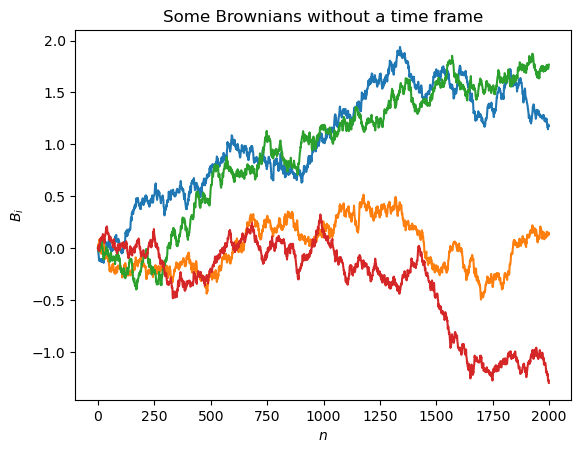

In [15]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [16]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [17]:
A, v

(array([[[ 0.70143528, -0.67142966, -0.37205335, -0.97575573],
         [ 0.05075507, -0.28148083, -1.16982946, -0.2439492 ]],
 
        [[ 0.36185576, -0.19582991, -0.56691811, -0.40500892],
         [ 1.014043  ,  1.55255038,  0.91214535,  0.20713043]],
 
        [[-0.32050305, -1.07281322, -0.38495523,  0.20524439],
         [-0.15058219, -0.2029544 ,  0.64148662,  0.3882909 ]]]),
 array([-0.02561533, -1.42375452, -1.27448149]))

### Time&step structure

In [18]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

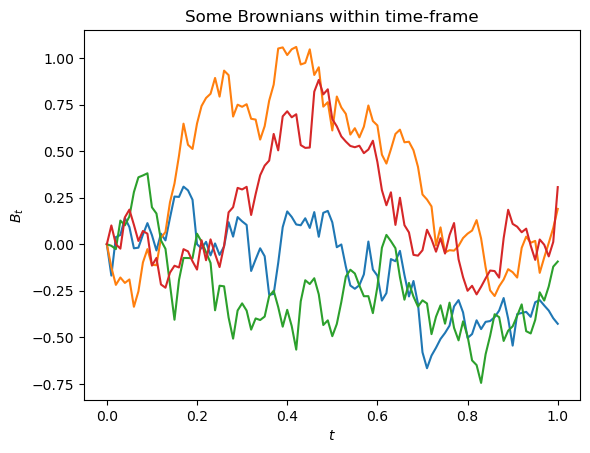

In [19]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(101))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Constructing the process

In [73]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [74]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

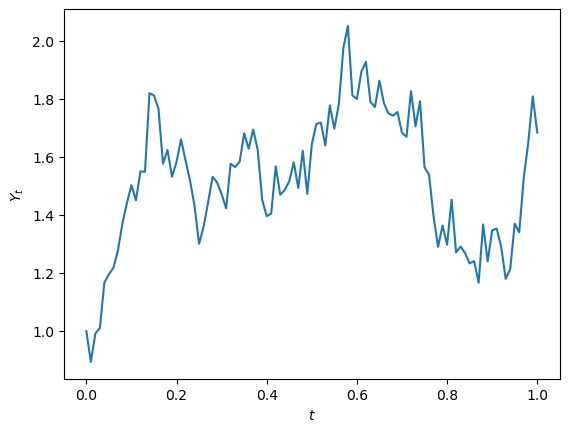

In [75]:
plt.plot(x_axis, Y)
plt.title("")
#Double Well process
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Calculating the true signature of the process

In [76]:
Y.shape

(101,)

In [77]:
k = 10
Y_tens = torch.Tensor(Y)
Y_tens = torch.reshape(Y_tens, (1, N, 1))
Y_tens.shape
Z = np.zeros((N, k))
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
sig = signatory.signature(Y_tens, k)

In [79]:
sig.shape

torch.Size([1, 10])

In [80]:
sig.numpy().shape

(1, 10)

In [81]:
aux = np.zeros((1,k))
aux[0,0] = 0
aux

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [82]:
Z[0] = aux
aux.shape

(1, 10)

In [83]:
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
path = torch.rand(1, 1000, 5)
path_class = signatory.Path(path, 3)
sig1 = path_class.signature(0, 40)
sig2 = path_class.signature(300, 600)
sig3 = path_class.signature(400, 990)
sig4 = path_class.signature(700, None)
sig5 = path_class.signature()
sig4.shape
torch.zeros(1, 10)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [85]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [86]:
initial=torch.zeros(1, 10)

In [87]:
Y_path_class = signatory.Path(Y_tens, k)
sig1 = Y_path_class.signature(0, 50)
sig1.shape

torch.Size([1, 10])

In [88]:
for i in range(1,N):
    Z[i] = Y_path_class.signature(0, i+1).numpy()

#Y_path_class.signature(0, 1)

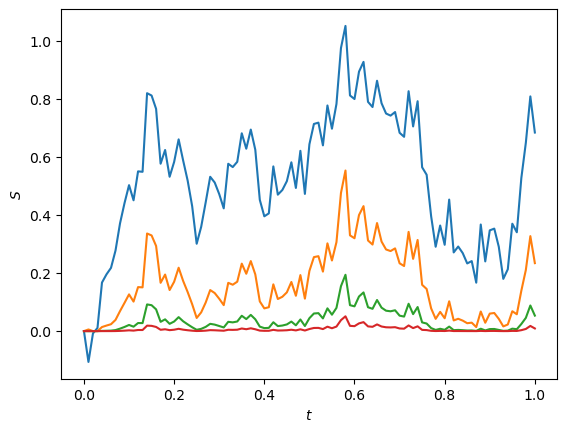

In [89]:
for i in range(4):
    plt.plot(x_axis, Z[:,i])

plt.title("")
#True signature of the Double Well process
plt.xlabel("$t$")
plt.ylabel("$S$")
plt.show()

In [35]:
Z.shape

(101, 10)

### Training the linear, time-homogeneous readout - without regularization

In [36]:
model1 = LinearRegression().fit(Z, Y)

In [37]:
r_sq_1 = model1.score(Z, Y)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.990178818768583


In [38]:
print(f"intercept: {model1.intercept_}")

intercept: 1.0244879487745397


In [39]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 8.72393047e-02 -2.20555008e+00  1.68574361e+02  3.51594197e+02
 -3.54106511e+04  6.52773470e+03  6.37674911e+06 -2.40531155e+07
 -6.98523257e+08  5.70060439e+09]


In [40]:
Y_pred_1 = model1.predict(Z)

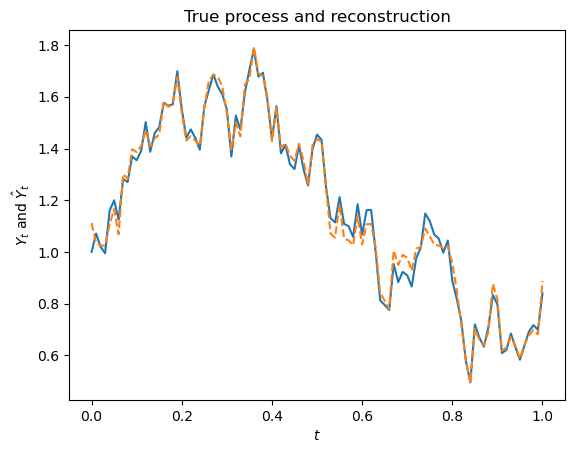

In [41]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Training the linear, time-homogeneous readout - with regularization

In [42]:
model2 = Lasso(alpha=0.010)
model2.fit(Z, Y)

Lasso(alpha=0.01)

In [43]:
r_sq_2 = model2.score(Z, Y)
print(f"coefficient of determination: {r_sq_2}")

coefficient of determination: 0.9104349813920368


In [44]:
print(f"intercept: {model2.intercept_}")

intercept: 1.0173832243408243


In [45]:
print(f"coefficients: {model2.coef_}")

coefficients: [0.84778704 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [46]:
Y_pred_2 = model2.predict(Z)

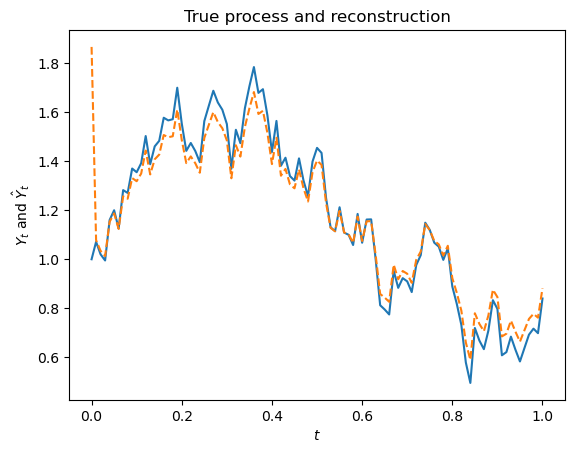

In [47]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_2, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample

In [48]:
n_sim = 1000
k = 15

Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))

Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(101, 15)

In [49]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    
    Y_big[iter*N:(iter+1)*N] = Y
    
    Y_tens = torch.Tensor(Y)
    Y_tens = torch.reshape(Y_tens, (1, N, 1))
    Y_path_class = signatory.Path(Y_tens, k)
    
    Z = np.zeros((N, k))
    Z[0][0] = 1
    
    for i in range(1,N):
        Z[i] = Y_path_class.signature(0, i+1).numpy()
    
    Z_big[iter*N:(iter+1)*N,:] = Z

In [50]:
model3 = Ridge(alpha=1.0)
model3.fit(Z_big, Y_big)

Ridge()

In [51]:
r_sq_3 = model3.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.9631431038513256


In [52]:
print(f"intercept: {model3.intercept_}")

intercept: 0.9934212804806576


In [53]:
print(f"coefficients: {model3.coef_}")

coefficients: [ 8.76111359e-01  1.04904645e-01  8.54111512e-01  1.34577178e-01
 -2.18434342e+00 -5.76868221e-01  3.09394482e-01 -1.83182105e-01
  6.34861953e-02 -1.95030978e-02  5.05892460e-03 -1.18334608e-03
  2.50059222e-04 -4.86501792e-05  8.76737287e-06]


In [54]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    
dY = np.diff(Y)
Y_tens = torch.Tensor(Y)
Y_tens = torch.reshape(Y_tens, (1, N, 1))
Y_path_class = signatory.Path(Y_tens, k)
    
Z = np.zeros((N, k))
Z[0][0] = 1
    
for i in range(1,N):
    Z[i] = Y_path_class.signature(0, i+1).numpy()



In [55]:
Y_pred_3 = model3.predict(Z)

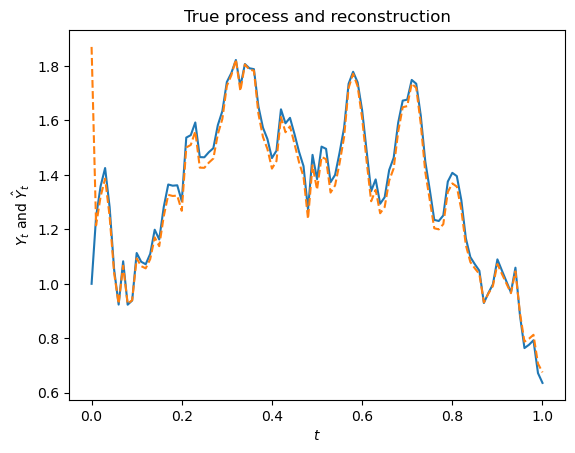

In [56]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

In [57]:
np.linalg.norm(Y[1:]-Y_pred_3[1:])

0.29226859111907827

## 4-Dimensional Ornstein–Uhlenbeck process

### Constructing the process

In [58]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [59]:
b = Brownian()

for i in range(4):
    brow_4[:,i] = b.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [60]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

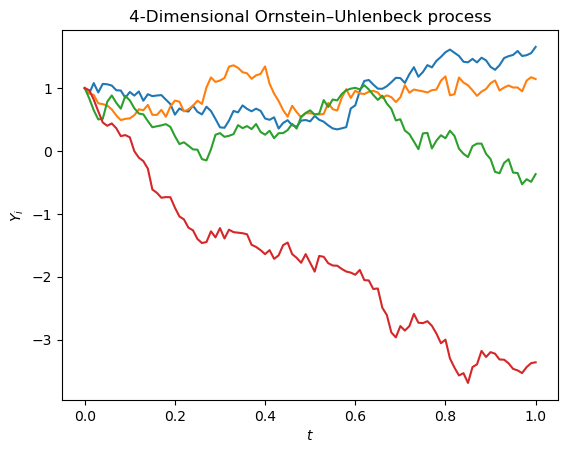

In [61]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [62]:
k_4 = 10
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [63]:
dY_4.shape

(100, 4)

In [64]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

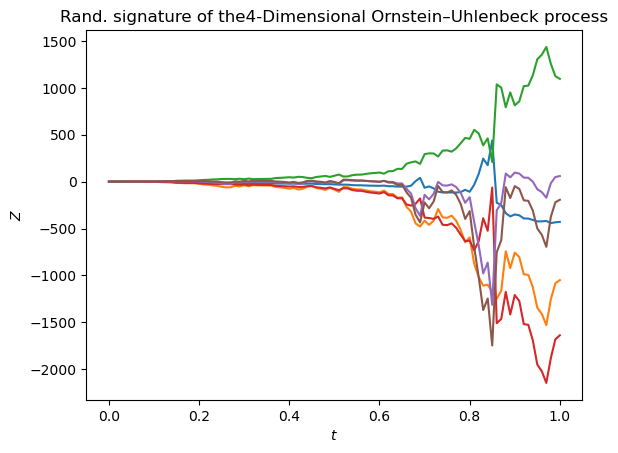

In [65]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [58]:
X = torch.rand(1, 2, 5)
# Calculate its signature to depth 3
sig_X = signatory.signature(X, 3)

In [61]:
sig_X[0][0]

tensor(0.2319)